 Implementing Feedforward neural networks with Keras and TensorFlow for classification of hand-written MNIST dataset using below steps:<br>
a. Import the necessary packages<br>
b. Load the training and testing data<br>
c. Define the network architecture using Keras<br>
d. Train the model using SGD with 11 epochs<br>
e. Evaluate the network<br>
f. Plot the training loss and accuracy

In [66]:
# Import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
#from tensorflow.keras import backend as K
#import tensorflow as tf

In [67]:
# Load training and testing data
((trainX, trainY), (testX, testY)) = mnist.load_data()

In [68]:
# each image in the MNIST dataset is represented as a 28x28x1
# image, but in order to apply a standard neural network we must
# first "flatten" the image to be simple list of 28x28=784 pixels
trainX = trainX.reshape(trainX.shape[0], 28 * 28 * 1)
testX = testX.reshape(testX.shape[0], 28 * 28 * 1)
# scale data to the range of [0, 1] and normalizing it
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
#encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

In [69]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784, ), activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [70]:
# train the model using SGD with 11 epoches
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=11) #, batch_size=128)

[INFO] training network...
Epoch 1/11
1875/1875 [==============================] - 18s 9ms/step - loss: 0.6013 - accuracy: 0.8418 - val_loss: 0.2957 - val_accuracy: 0.9187
Epoch 2/11
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2795 - accuracy: 0.9199 - val_loss: 0.2346 - val_accuracy: 0.9345
Epoch 3/11
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2265 - accuracy: 0.9350 - val_loss: 0.1990 - val_accuracy: 0.9419
Epoch 4/11
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1928 - accuracy: 0.9452 - val_loss: 0.1783 - val_accuracy: 0.9471
Epoch 5/11
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1680 - accuracy: 0.9519 - val_loss: 0.1608 - val_accuracy: 0.9526
Epoch 6/11
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1484 - accuracy: 0.9578 - val_loss: 0.1453 - val_accuracy: 0.9569
Epoch 7/11
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1335 - accuracy: 0.9623 

In [72]:
# evaluate the network
print("[INFO] evaluating network...")
labelnames = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelnames))

[INFO] evaluating network...
79/79 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.95      0.96       892
           6       0.97      0.98      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



<Figure size 432x288 with 0 Axes>

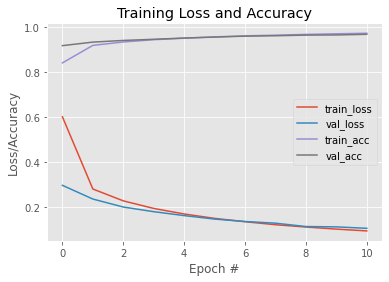

<Figure size 432x288 with 0 Axes>

In [73]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.plot(np.arange(0, 11), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 11), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 11), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 11), H.history["val_accuracy"], label="val_acc")
plt.legend()
plt.figure()